**Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the Dataset**

In [2]:
titanic_df = sns.load_dataset('titanic')

In [3]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Initial Analysis on the Dataset**

In [4]:
# Display the basic information
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


* Survived: This variable indicates whether a passenger survived or not. It is encoded as 0 for not survived and 1 for survived.
* Pclass: This variable represents the passenger class. It is a categorical variable with three levels: 1 (first class), 2 (second class), and 3 (third class).
* Sex: This variable represents the gender of the passenger. It is a categorical variable with two levels: "male" and "female".
* Age: This variable represents the age of the passenger. It is a continuous numerical variable.
* SibSp: This variable represents the number of siblings or spouses aboard the Titanic for a given passenger. It is a discrete numerical variable.
* Parch: This variable represents the number of parents or children aboard the Titanic for a given passenger. It is a discrete numerical variable.
* Fare: This variable represents the fare (ticket price) paid by the passenger. It is a continuous numerical variable.
* Embarked: This variable represents the port of embarkation for a given passenger. It is a categorical variable with three levels: "C" (Cherbourg), "Q" (Queenstown), and "S" (Southampton).
* class: This variable is similar to the "Pclass" variable and represents the passenger class. It is a categorical variable with three levels: "First", "Second", and "Third".
* who: This variable indicates whether the passenger is a man, woman, or child. It is a categorical variable with three levels: "man", "woman", and "child".
* adult_male: This variable indicates whether the passenger is an adult male or not. It is a Boolean variable.
* deck: This variable represents the deck where the passenger's cabin was located. It is a categorical variable.
* embark_town: This variable is similar to the "Embarked" variable and represents the port of embarkation. It is a categorical variable.
* alive: This variable indicates whether the passenger survived or not. It is a categorical variable with two levels: "yes" and "no".
* alone: This variable indicates whether the passenger was traveling alone or with family members. It is a Boolean variable.

**Suggestions**

To avoid redundancy and improve the efficiency of your machine learning algorithm, you can
consider dropping some variables that provide similar or redundant information. Based on the
variable descriptions provided earlier, here are a few suggestions for potential variables to drop:

* class: This variable seems redundant as it provides information similar to the "Pclass" variable. You can consider dropping either "class" or "Pclass".
* who: This variable provides information about the gender and age category of the passenger. Since you already have the "Sex" and "Age" variables, you could drop the "who" variable.
* adult_male: This variable indicates whether the passenger is an adult male. Since you already have the "Sex" variable, which provides gender information, you may not need this variable.
* embark_town: This variable represents the port of embarkation and is similar to the "Embarked" variable. You can drop either "embark_town" or "Embarked".
* alive: This variable indicates whether the passenger survived or not, which is essentially the same information as the target variable "Survived". You can drop the "alive" variable.

In [5]:
titanic_df.drop(['class', 'who', 'adult_male', 'embarked', 'alive'], axis = 1, inplace = True)

In [6]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,NaN,Southampton,True


**Exploratory Data Analysis(EDA)**

In [7]:
# Calculate the null values and percentages
null_counts = titanic_df.isnull().sum()
null_percentages = (null_counts / len(titanic_df)) * 100

# Create a DataFrame to display the results
null_df = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentages})
null_df.sort_values(by = 'Null Count', ascending=False, inplace=True)

null_df

,Null Count,Null Percentage
deck,688,77.216611
age,177,19.865320
embark_town,2,0.224467
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000
alone,0,0.000000


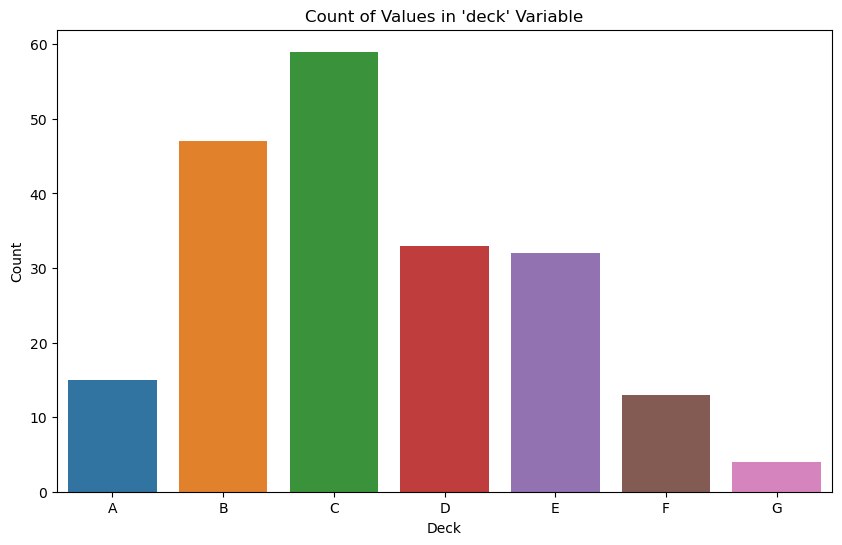

In [8]:
# Plotting the count of values in the 'deck' variable
plt.figure(figsize=(10, 6))
sns.countplot (data=titanic_df, x='deck')
plt.title("Count of Values in 'deck' Variable")
plt.xlabel("Deck")
plt.ylabel("Count")
plt. show()

By analyzing the plot, you can observe the following:
* The 'deck' variable contains several categories represented by letters A, B, C, D, E, F, and G. These letters correspond to different decks on the Titanic.
* The majority of passengers in the dataset do not have a specific deck assigned (missing values or NaNs). This is indicated by the tallest bar in the plot.
* The most common deck among the passengers with a specified value is Deck C, followed by Deck B, Deck D, and Deck E.

<Figure size 1000x600 with 0 Axes>

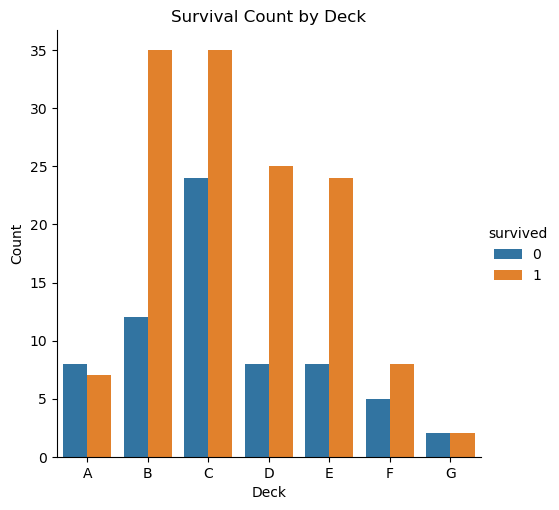

In [9]:
# Plotting the 'deck' variable relative to 'survived'
plt.figure (figsize=(10, 6))
sns.catplot (data=titanic_df, x='deck', hue='survived', kind='count')
plt.title("Survival Count by Deck")
plt.xlabel("Deck")
plt.ylabel("Count")
plt. show()

The plot provides insights into the relationship between the 'deck' variable and the target variable 'survived":
* Decks A, B, and C have a higher proportion of passengers who survived compared to those who did not survive. This indicates a potential correlation between these decks and survival.
* Decks D and E also show a higher proportion of survivors, but not as pronounced as the earlier decks.
* Decks F and G have a higher proportion of passengers who did not survive, indicating a potential correlation between these decks and a lower chance of survival.
* The majority of passengers without a specified deck value (NaN) have a lower chance of survival.

In [10]:
titanic_df.drop("deck", axis=1, inplace=True)

In [11]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,False
1,1,1,female,38.0,1,0,71.2833,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,Southampton,True
3,1,1,female,35.0,1,0,53.1000,Southampton,False
4,0,3,male,35.0,0,0,8.0500,Southampton,True


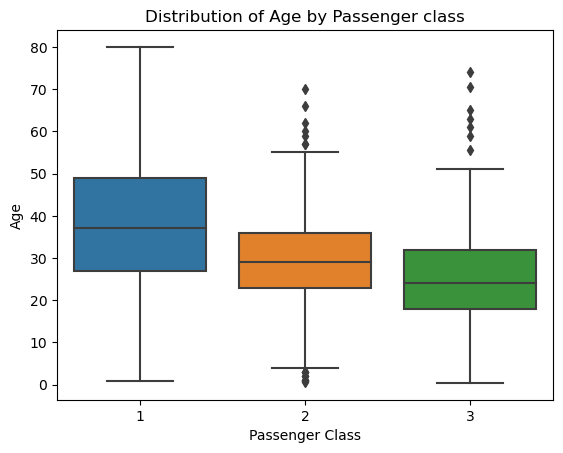

In [12]:
sns.boxplot (x="pclass", y="age", data=titanic_df)
plt.title("Distribution of Age by Passenger class")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.show()

By examining the box plot, you can gain several insights, such as:
* Passengers in class 1 generally have a wider range of ages compared to the other classes. 
* The median age for passengers in class 1 is higher than for passengers in classes 2 and 3. 
* Passengers in class 2 tend to have a slightly narrower age range compared to class 1.
* Class 3 passengers have the widest range of ages, with a median age lower than the other classes.

To determine the average age for each value of the "pclass" variable based on the box plot, we can look at the median age represented by the line inside each box. The median age is a good estimate of the central tendency of the age distribution within each passenger class. Here are the approximate average ages for each passenger class based on the box plot:
* Class 1: The median age is around 35-40 years. 
* Class 2: The median age is around 25-30 years. 
* Class 3: The median age is around 20-25 years.

In [13]:
# Define the values to fill for each passenger class
fill_values = {1: 38, 2: 28, 3: 23}

# Iterate over the rows and fill missing age values based on pclass
for index, row in titanic_df.iterrows():
    if pd.isnull(row['age']):
        titanic_df.loc[index, 'age'] = fill_values[row['pclass']]

This code defines a dictionary fill_values where the keys represent the passenger class values (1, 2, and 3) and the corresponding values represent the ages to fill for each class. Then, it iterates over the rows of the "titanic_df" dataframe and checks if the age value is missing (pd.isnull(row['age'])). If it is, it fills the age value based on the passenger class using the fillna() function.

In [14]:
# Calculate the null values and percentages
null_counts = titanic_df.isnull().sum()
null_percentages = (null_counts / len(titanic_df)) * 100

# Create a DataFrame to display the results
null_df = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentages})
null_df.sort_values(by='Null Count', ascending=False, inplace=True)

null_df

,Null Count,Null Percentage
embark_town,2,0.224467
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
age,0,0.000000
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000
alone,0,0.000000


In [15]:
# Drop the missing rows of the 'embark_town' variable
titanic_df.dropna(subset=['embark_town'], inplace=True)

# Verify the updated dataset
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,False
1,1,1,female,38.0,1,0,71.2833,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,Southampton,True
3,1,1,female,35.0,1,0,53.1000,Southampton,False
4,0,3,male,35.0,0,0,8.0500,Southampton,True


In [16]:
# Calculate the null values and percentages
null_counts = titanic_df.isnull().sum()
null_percentages = (null_counts / len(titanic_df)) * 100

# Create a DataFrame to display the results
null_df = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentages})
null_df.sort_values(by='Null Count', ascending=False, inplace=True)

null_df

,Null Count,Null Percentage
survived,0,0.0
pclass,0,0.0
sex,0,0.0
age,0,0.0
sibsp,0,0.0
parch,0,0.0
fare,0,0.0
embark_town,0,0.0
alone,0,0.0


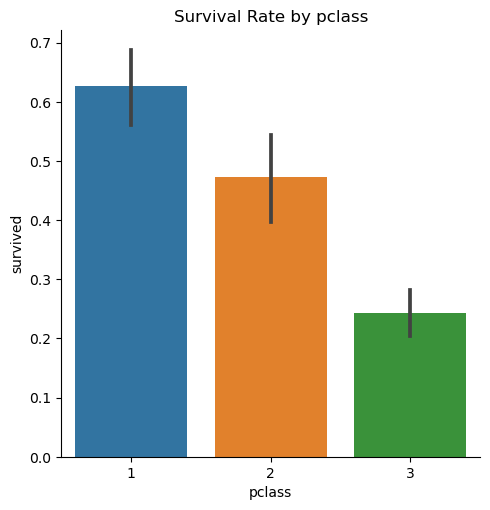

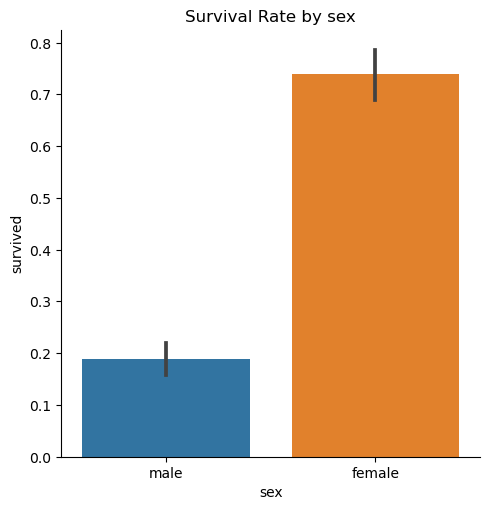

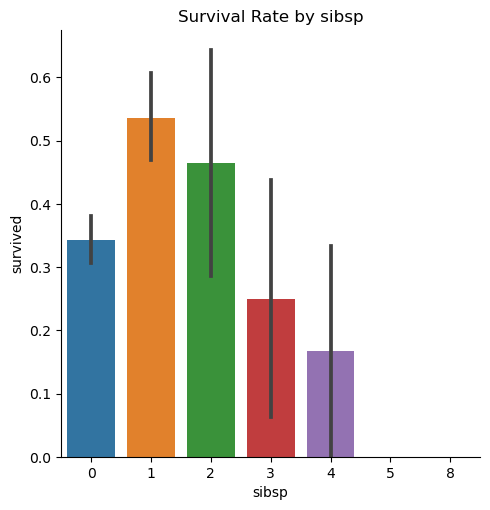

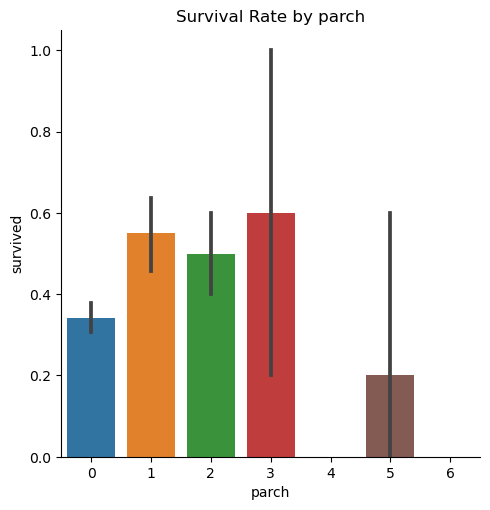

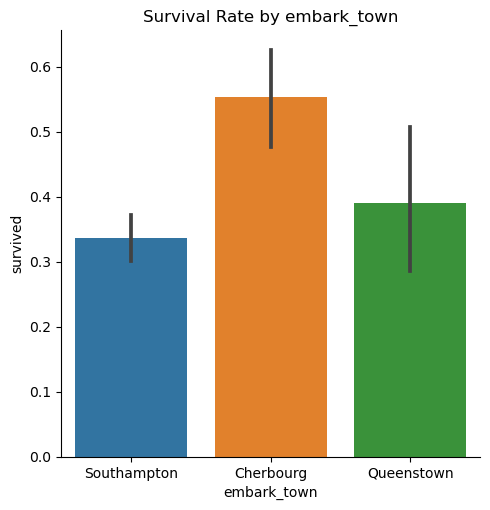

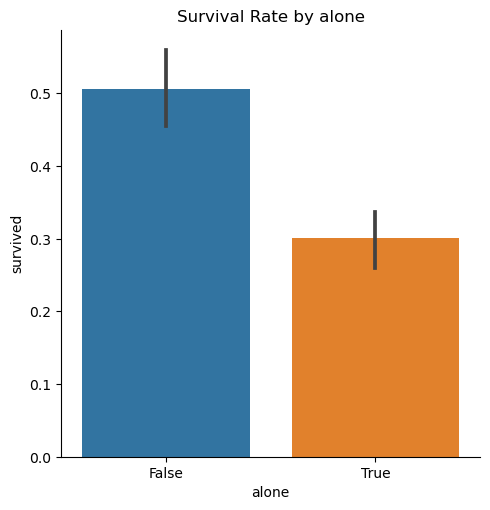

In [17]:
# Get the list of variables (columns) in the dataset, excluding 'age' and 'fare'
variables = titanic_df.columns.tolist()
variables.remove('age')
variables.remove('fare')
variables.remove('survived')

# Loop through the variables and create visualizations
for variable in variables:
    sns.catplot(x=variable, y='survived', data=titanic_df, kind='bar')
    plt.title(f"Survival Rate by {variable}")
    plt.show()

In this code, we first obtain the list of variables in the dataset (excluding 'age' and 'fare'). Then, using a for loop, we iterate over each variable and create a bar plot using Seaborn's catplot() function. This plot shows the relationship between each variable and the 'survived' variable.

The x parameter in catplot() specifies the variable to be plotted on the x-axis, and the y parameter represents the 'survived' variable. The kind parameter is set to 'bar' to create a bar plot.

Inside the loop, we set the plot title dynamically based on the current variable being analyzed using an f-string (f"Survival Rate by {variable}"). Finally, we display the plot using plt.show().

Pclass (Passenger Class):

* You can analyze the survival rates for each passenger class (1st, 2nd, 3rd).
Look for differences in survival rates between classes. Typically, higher-class passengers (lower Pclass values) may have a higher survival rate.

Sex:

* You can compare the survival rates between males and females.
* Look for differences in survival rates between genders. Historically, females were given priority during the Titanic disaster, so it's expected to see a higher survival rate for females.

SibSp (Number of Siblings/Spouses Aboard):

* You can observe the survival rates based on the number of siblings/spouses aboard the Titanic.
* Look for patterns or trends in survival rates based on the number of siblings/spouses. It's possible that having a certain number of family members could influence the chances of survival.

Parch (Number of Parents/Children Aboard):

* You can examine the survival rates based on the number of parents/children aboard the Titanic.
* Look for any correlations between the number of parents/children and survival rates. Having family members on board may impact the likelihood of survival.

Embark_town (Port of Embarkation):

* You can analyze the survival rates for passengers from different ports of embarkation (Cherbourg, Queenstown, Southampton).
* Look for variations in survival rates based on the port of embarkation. Factors such as socio-economic status or cabin location might differ based on the port of embarkation.

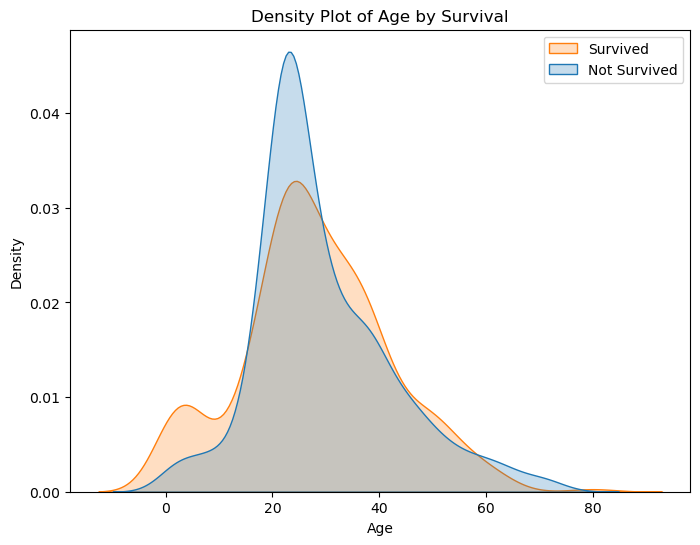

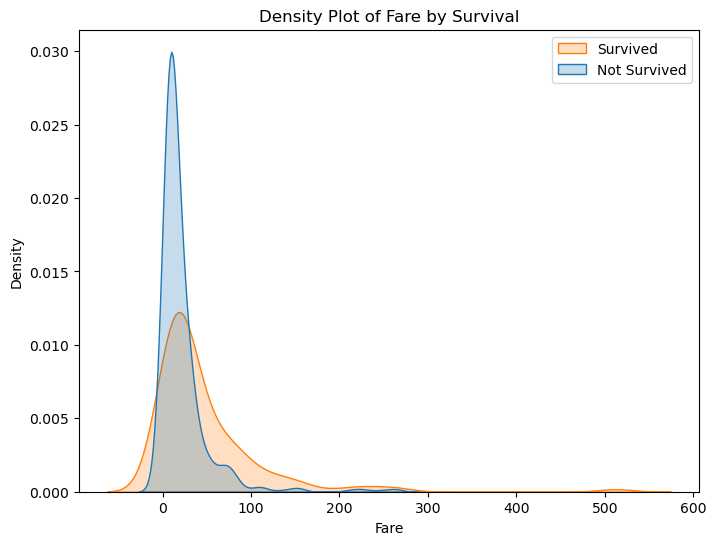

In [18]:
# Create a loop to plot density graphs
variables = ['age', 'fare']
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=titanic_df, x=var, hue='survived', fill=True, common_norm=False)
    plt.title(f'Density Plot of {var.capitalize()} by Survival')
    plt.xlabel(var.capitalize())
    plt.ylabel('Density')
    plt.legend(['Survived', 'Not Survived'])
    plt.show()

* Age: The density plot shows the distribution of age for both the survived and not survived groups. You can compare the peaks and spread of the curves to understand any differences. For example, if the density for a specific age range is higher in the survived group compared to the not survived group, it indicates a higher survival rate for passengers within that age range.

* Fare: The density plot illustrates the distribution of fare (passenger fares) for the survived and not survived groups. Again, you can compare the shape, peaks, and spread of the curves to analyze any patterns. A higher density in a particular fare range for the survived group might suggest that passengers who paid higher fares had a better chance of survival.

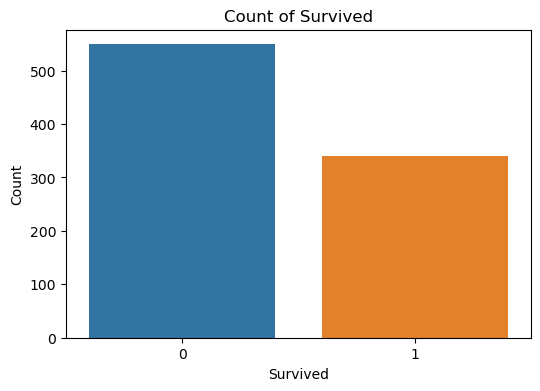

In [19]:
# Create a countplot for the "survived" variable
plt.figure(figsize=(6, 4))
sns.countplot(data=titanic_df, x='survived')
plt.title('Count of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

/var/folders/2b/hnwsjxzn6mqbghj42rzct2t00000gq/T/ipykernel_72989/3782746105.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic_df.corr()


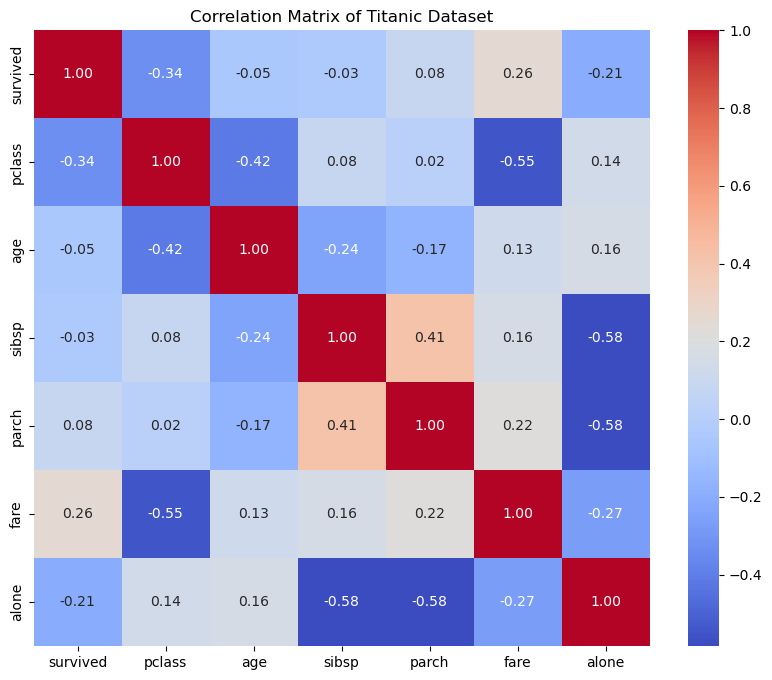

In [20]:
# Calculate the correlation matrix
correlation_matrix = titanic_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()

This code uses the seaborn.heatmap() function to create a heatmap of the correlation matrix. The correlation matrix calculates the pairwise correlations between all the variables in the dataset, and the heatmap visually represents the correlation values.

After running the code, you will see a heatmap where each cell represents the correlation between two variables. The color of each cell indicates the strength and direction of the correlation, with warmer colors (e.g., red) representing positive correlations, cooler colors (e.g., blue) representing negative correlations, and shades of white indicating weaker or no correlation.

By analyzing the correlation matrix heatmap, you can identify the relationships between different variables in the Titanic dataset. Strong positive or negative correlations suggest a significant relationship between two variables, while weak or no correlations suggest little or no relationship. This can help you understand which variables may have a significant impact on the target variable or identify potential multicollinearity issues.

Survival Correlations:

* "Survived" shows a moderate positive correlation with "fare". This suggests that passengers who paid higher fares had a slightly higher chance of survival.
* "Survived" also shows a weak negative correlation with "pclass" (passenger class). This indicates that passengers in higher classes (lower class numbers) had a higher likelihood of survival.

Fare Correlations:

* "Fare" shows a strong positive correlation with "pclass". This indicates that higher-class passengers paid higher fares, which is expected.
* There is a weak positive correlation between "fare" and "age". This suggests that older passengers tend to pay slightly higher fares.

Age Correlations:

* There is a weak negative correlation between "age" and "pclass". This indicates that older passengers tended to be in higher classes.
* "Age" also shows a weak negative correlation with "sibsp" (number of siblings/spouses aboard). This suggests that younger passengers tend to have more siblings or spouses on board.

Now, let's analyze the heatmap and determine which variables may be unnecessary for the model, considering the target variable "survived." In the heatmap, look for variables that have a very low correlation with "survived" (close to 0). These variables may not provide much information for predicting the survival outcome and can be considered for removal.

For example, if we observe that "parch" (number of parents/children aboard), "sibsp" (number of siblings/spouses aboard), and age have low correlation values with "survived," we can consider dropping them:

In [21]:
titanic_df = titanic_df.drop(columns=['parch', 'sibsp', 'age'])

In [22]:
titanic_df.head()

,survived,pclass,sex,fare,embark_town,alone
0,0,3,male,7.2500,Southampton,False
1,1,1,female,71.2833,Cherbourg,False
2,1,3,female,7.9250,Southampton,True
3,1,1,female,53.1000,Southampton,False
4,0,3,male,8.0500,Southampton,True


To convert categorical variables into a numeric form, you can use various techniques such as one-hot encoding or label encoding. Here, I'll demonstrate how to perform one-hot encoding for the variables 'sex', 'embark_town', and 'alone' in the Titanic dataset.

In [23]:
# Perform one-hot encoding
titanic_df = pd.get_dummies(titanic_df, columns=['sex', 'embark_town', 'alone'], drop_first=True)

In the code above, we pass the columns we want to encode as a list to the columns parameter of get_dummies(). The drop_first=True argument ensures that we drop the first category of each encoded variable to avoid multicollinearity issues.

In [24]:
titanic_df.head()

,survived,pclass,fare,sex_male,embark_town_Queenstown,embark_town_Southampton,alone_True
0,0,3,7.2500,1,0,1,0
1,1,1,71.2833,0,0,0,0
2,1,3,7.9250,0,0,1,1
3,1,1,53.1000,0,0,1,0
4,0,3,8.0500,1,0,1,1


**Modelling**

Split the Dataset: Divide your dataset into training and testing subsets. The training set is used to train the logistic regression model, while the testing set is used to evaluate its performance.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Split the dataset into features (X) and target variable (y)
X = titanic_df.drop('survived', axis=1)
y = titanic_df['survived']

In [27]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the Model: Fit the logistic regression model on the training data. This step involves finding the optimal coefficients that maximize the likelihood of the observed outcomes.

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Evaluate the Model: Assess the performance of your trained model on the testing data. Common evaluation metrics for logistic regression include accuracy, precision, recall, F1-score, and area under the receiver operating characteristic curve (AUC-ROC).

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [31]:
# Make predictions on the test set
y_pred = model.predict(X_test)

* Accuracy: Accuracy is the most basic evaluation metric and represents the proportion of correctly predicted instances (both true positives and true negatives) out of the total number of instances. It is calculated as:

* Accuracy = (TP + TN) / (TP + TN + FP + FN)

* However, accuracy alone may not be sufficient if the dataset is imbalanced, meaning that one class is much more prevalent than the other. In such cases, accuracy can be misleading, and it's important to consider additional metrics.

In [32]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7808988764044944


* Precision: Precision is the proportion of true positive predictions out of the total instances predicted as positive (both true positives and false positives). It measures the model's ability to accurately identify positive instances. Precision is calculated as:

* Precision = TP / (TP + FP)

* Precision is useful when the cost of false positives is high, such as in medical diagnoses where misclassifying a healthy person as having a disease can lead to unnecessary treatments or procedures.

In [33]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.6829268292682927


* Recall (Sensitivity or True Positive Rate): Recall represents the proportion of true positive predictions out of the total actual positive instances (both true positives and false negatives). It measures the model's ability to find all positive instances. Recall is calculated as:

* Recall = TP / (TP + FN)

* Recall is important when the cost of false negatives is high, such as in detecting fraudulent transactions or identifying diseases where missing positive instances can have severe consequences.

In [34]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.8115942028985508


* F1-score: The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. The F1-score is calculated as:

* F1-score = 2 * (Precision * Recall) / (Precision + Recall)

* The F1-score is useful when you want to consider both precision and recall and want to find a balance between them.

In [35]:
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

F1-score: 0.7417218543046358


* Area Under the ROC Curve (AUC-ROC): The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various classification thresholds. The AUC-ROC represents the overall performance of the model across all possible thresholds. A higher AUC-ROC value indicates better model performance. The AUC-ROC ranges between 0 and 1, where 0.5 represents a random classifier and 1 represents a perfect classifier.

* The AUC-ROC is useful when you want to evaluate the model's performance across various thresholds and have a clear distinction between positive and negative classes. It is commonly used in binary classification problems.

In [36]:
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", roc_auc)

AUC-ROC: 0.7865310464034039


In summary, based on these metrics, the model appears to perform reasonably well, capturing a good proportion of positive instances while maintaining a relatively low rate of false positives. 

Fine-tune the hyperparameters of your logistic regression model to improve its performance. This step may involve techniques like cross-validation or grid search to find the optimal combination of hyperparameters.

* Define the Hyperparameters: Identify the hyperparameters of the logistic regression model that you want to tune. Some common hyperparameters for logistic regression include the regularization parameter (C or alpha), the penalty type (l1 or l2), and the solver algorithm.

* Set the Search Space: Define the range of hyperparameter values to search over. For each hyperparameter, specify a range or list of values to consider during the search. The choice of search space depends on the hyperparameter and your domain knowledge. For example, you might try a range of values for the regularization parameter C or a list of penalty types.

In [37]:
# Define the hyperparameters to tune
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

* Choose a Search Strategy: Determine the search strategy to explore different combinations of hyperparameters. Two common search strategies are grid search and random search. Grid search exhaustively evaluates all possible combinations of specified hyperparameter values, while random search randomly selects combinations from a defined search space.

In [38]:
from sklearn.model_selection import GridSearchCV

* Select a Performance Metric: Choose a performance metric to evaluate and compare different combinations of hyperparameters. Common metrics include accuracy, precision, recall, F1-score, or AUC-ROC. The choice of metric depends on the specific problem and requirements.

* Implement the Search: Use the chosen search strategy (grid search or random search) to explore different combinations of hyperparameters. Evaluate each combination of hyperparameters by training and cross-validating the logistic regression model using the chosen performance metric.

In [39]:
# Create the logistic regression model
model = LogisticRegression()

In [40]:
# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)

In [41]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

/Users/alica1/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alica1/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alica1/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alica1/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alica1/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alica1/anaconda3/lib/python3.11/site-packages/sklearn

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

* Evaluate Results: Compare the performance of different hyperparameter combinations based on the selected performance metric. Identify the combination that yields the best performance on the validation or cross-validation set.

In [42]:
# Get the best hyperparameters and model
best_params = grid_search.best_params_
print(best_params)

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


* Validate on Test Set: After selecting the best hyperparameters based on the validation set, evaluate the final model's performance on a separate test set. This step provides an unbiased estimate of how well your tuned model will perform on new, unseen data.

In [43]:
best_model = grid_search.best_estimator_

In [44]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

* Refine and Repeat: If the performance of the tuned model is not satisfactory, you can further refine your search by adjusting the search space, trying different hyperparameters, or considering more advanced techniques like Bayesian optimization or gradient-based optimization methods.

In [45]:
# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [46]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", roc_auc)

Accuracy: 0.8033707865168539
Precision: 0.7297297297297297
Recall: 0.782608695652174
F1-score: 0.7552447552447553
AUC-ROC: 0.799561228560032


# Good Luck!